In [44]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Read Data
df = pd.read_csv('aapl_ok.csv',sep=';')
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.set_index('fecha')
df.tail()

,Trimeste,Ingresos
fecha,,
2020-06-27,Q3 2020,59685
2020-09-26,Q4 2020,64698
2020-12-26,Q1 2021,111439
2021-03-27,Q2 2021,89584
2021-06-26,Q3 2021,81434


In [46]:
df.dtypes

Trimeste    object
Ingresos    object
dtype: object

In [47]:
df['Ingresos'] = df['Ingresos'].str.replace(',', '.').astype('float64')
df.head()
df.dtypes

Trimeste     object
Ingresos    float64
dtype: object

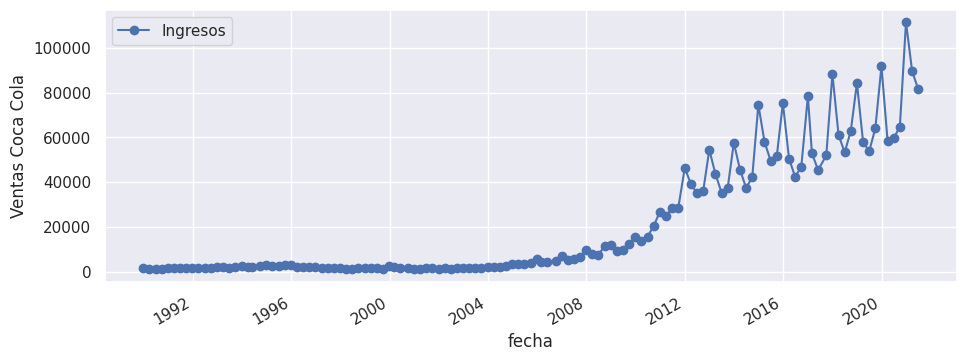

In [48]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df.plot( y = 'Ingresos', marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');

son estacionarios y tienen una tendencia alcista. varianza no constante

In [49]:
trimestral=df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
trimestral.tail()

,Trimeste,Ingresos
fecha,,
2020-06-30,Q3 2020,59685.0
2020-09-30,Q4 2020,64698.0
2020-12-31,Q1 2021,111439.0
2021-03-31,Q2 2021,89584.0
2021-06-30,Q3 2021,81434.0


In [50]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

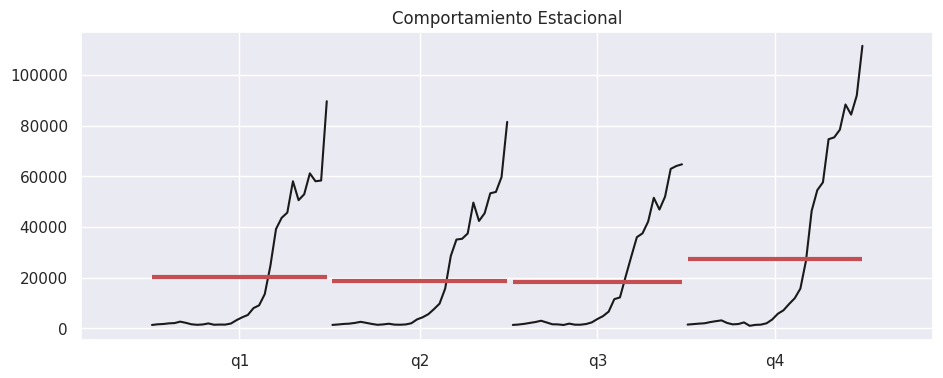

In [51]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(trimestral['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

In [52]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

119 8


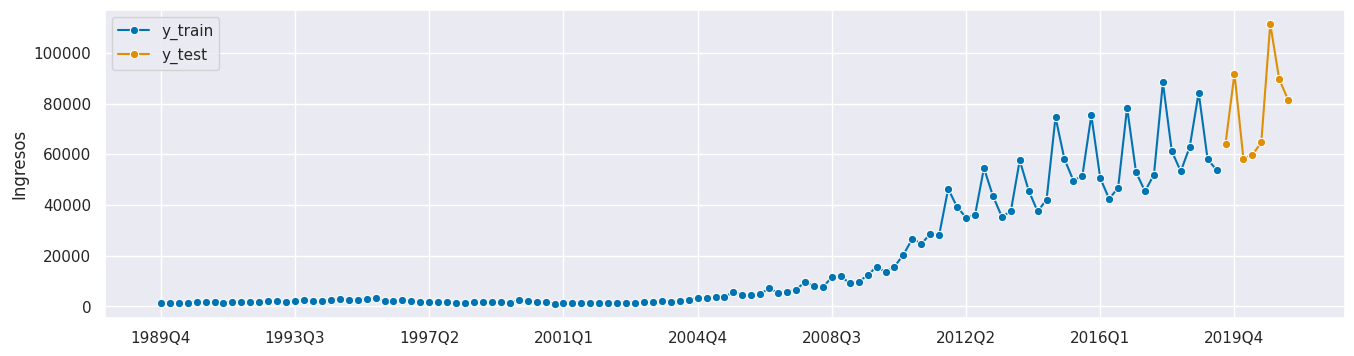

In [80]:
y_train, y_test = temporal_train_test_split(y = trimestral['Ingresos'].astype('float64').to_period('Q'), test_size=8)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [54]:
from sktime.forecasting.ets import AutoETS

In [55]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 15)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

aapl_auto_model.fit(y_train)
print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  119
Model:                       ETS(MAM)   Log Likelihood                -968.025
Date:                Sat, 07 Oct 2023   AIC                           1956.050
Time:                        20:57:05   BIC                           1983.841
Sample:                    12-31-1989   HQIC                          1967.335
                         - 06-30-2019   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4225      0.055      7.739      0.000       0.316       0.530
smoothing_trend        0.1685      0.034      4.890      0.000       0.101       0.236
smoothing_seasonal  

In [56]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

2019Q3    58581.326742
2019Q4    85963.040159
2020Q1    59751.798679
2020Q2    53079.526151
2020Q3    58323.465808
2020Q4    85584.234646
2021Q1    59488.205472
2021Q2    52845.108937
2021Q3    58065.604875
2021Q4    85205.429133
2022Q1    59224.612265
2022Q2    52610.691722
2022Q3    57807.743942
2022Q4    84826.623619
Freq: Q-DEC, Name: Ingresos, dtype: float64


In [57]:
aapl_pred_ints = aapl_auto_model.predict_interval(fh, coverage=0.9)
aapl_pred_ints

Ingresos               
                 0.9               
               lower          upper
2019Q3  46675.293610   71779.392105
2019Q4  66866.413695  108743.501368
2020Q1  43782.891942   79016.843857
2020Q2  35732.463494   75640.974171
2020Q3  33709.068195   89543.245259
2020Q4  44680.053275  140658.642061
2021Q1  27864.313451  103911.363441
2021Q2  20363.002169  100263.676136
2021Q3  17488.762246  123384.107212
2021Q4  19772.821575  194542.894315
2022Q1   8472.087103  134135.592885
2022Q2   3420.239900  134934.856558
2022Q3   -924.777810  164014.249072
2022Q4  -8581.529503  251043.445854

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

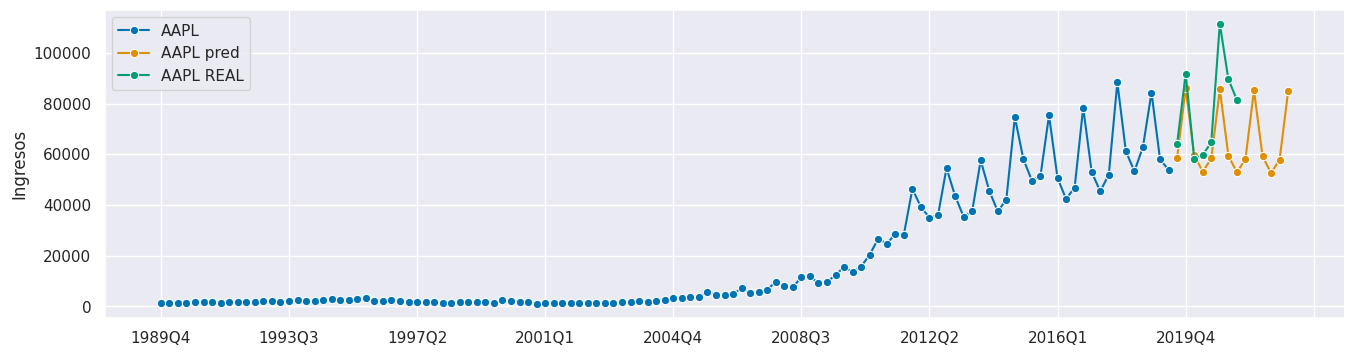

In [58]:
# optional: plotting predictions and past data
plot_series(y_train, aapl_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

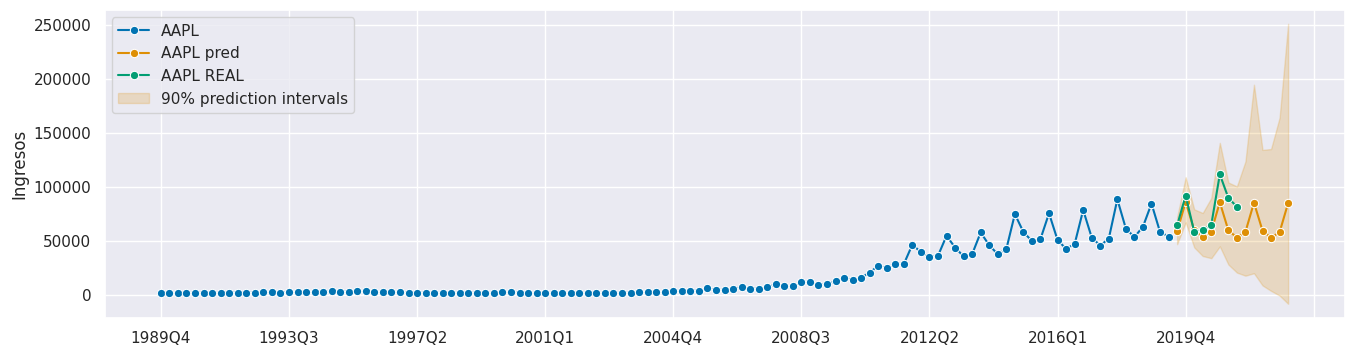

In [59]:
fig, ax = plot_series(y_train, aapl_pred, y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    aapl_pred_ints[('Ingresos', 0.9, 'lower')],
    aapl_pred_ints[('Ingresos', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

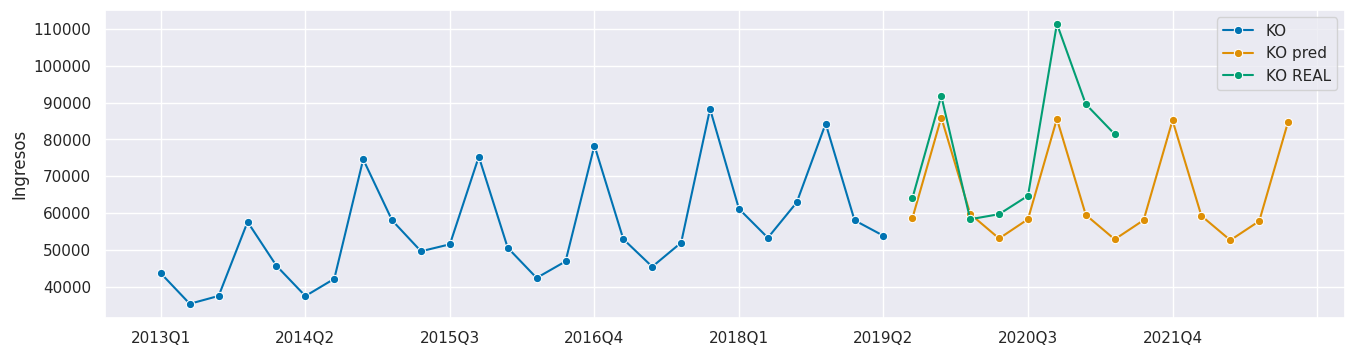

In [60]:
plot_series(y_train["2013":], aapl_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

In [61]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, aapl_pred[0:8])

0.16273953082780607

In [62]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, aapl_pred[0:8])

317747115.49760485

In [63]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, aapl_pred[0:8])

17825.462560550983

In [74]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

y = trimestral['Ingresos'].astype('float64').to_period('Q')

aapl_auto_model.fit(y)

print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  127
Model:                       ETS(MAM)   Log Likelihood               -1052.310
Date:                Sat, 07 Oct 2023   AIC                           2124.620
Time:                        21:15:24   BIC                           2153.062
Sample:                    12-31-1989   HQIC                          2136.176
                         - 06-30-2021   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4303      0.055      7.816      0.000       0.322       0.538
smoothing_trend        0.1718      0.035      4.969      0.000       0.104       0.240
smoothing_seasonal  

In [75]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

2021Q3     94928.198386
2021Q4    153907.759505
2022Q1    112068.409844
2022Q2    104446.057804
2022Q3    120404.562349
2022Q4    192615.706400
Freq: Q-DEC, Name: Ingresos, dtype: float64


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

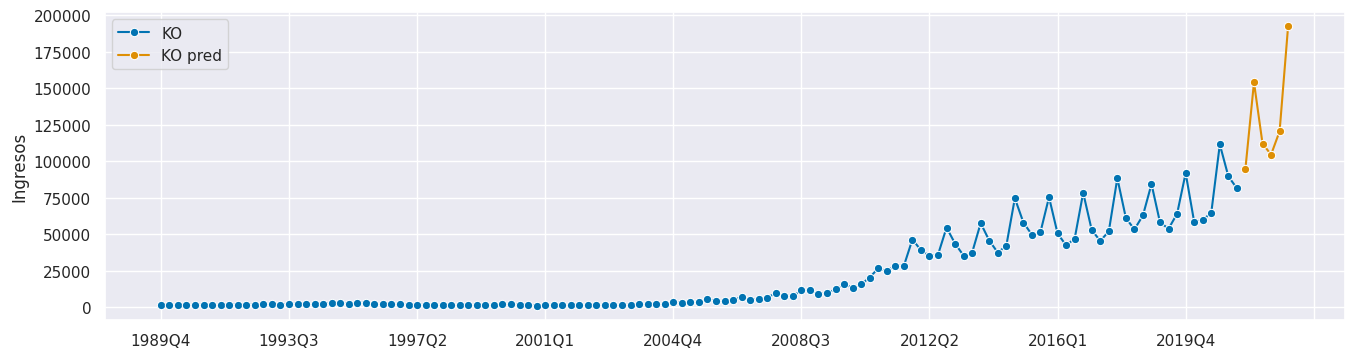

In [66]:
plot_series(y, aapl_pred, labels=["KO", "KO pred"])

In [81]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=4) #el error lo toma aditivo si no pongo nada
forecaster.fit(y_train)

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='multiplicative')

In [85]:
fh = np.arange(1, 15)
y_pred = forecaster.predict(fh)
y_pred

2019Q3     61466.439517
2019Q4     94037.269536
2020Q1     67629.948649
2020Q2     60848.128567
2020Q3     70158.713485
2020Q4    107335.546065
2021Q1     77193.835002
2021Q2     69452.964117
2021Q3     80080.205011
2021Q4    122514.397812
2022Q1     88110.197943
2022Q2     79274.652126
2022Q3     91404.743846
2022Q4    139839.766243
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [86]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  119
Model:             ExponentialSmoothing   SSE                     1042754890.323
Optimized:                         True   AIC                           1918.335
Trend:                   Multiplicative   BIC                           1940.568
Seasonal:                Multiplicative   AICC                          1920.372
Seasonal Periods:                     4   Date:                 Sat, 07 Oct 2023
Box-Cox:                          False   Time:                         21:22:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6767857                alpha                 True
smoothing_trend          

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

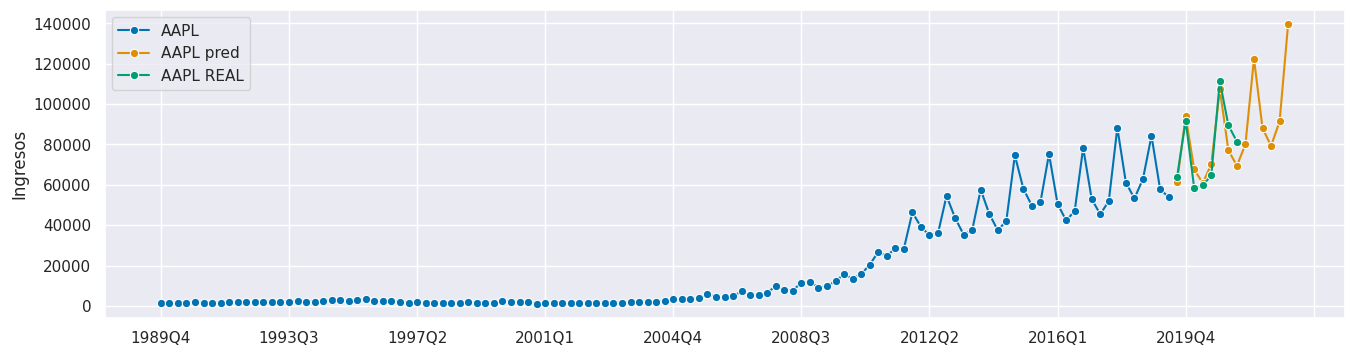

In [87]:
#plot_series(y, y_pred, labels=["KO", "KO pred"])
plot_series(y_train, y_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

In [95]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred[0:8])

0.08128344746328568

In [96]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, y_pred[0:8])

55427683.61878385

In [98]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, y_pred[0:8])

7444.977073086515

In [99]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

y = trimestral['Ingresos'].astype('float64').to_period('Q')

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=4) #el error lo toma aditivo si no pongo nada
forecaster.fit(y)


/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='multiplicative')

In [100]:
y_pred = forecaster.predict(fh)
y_pred

2021Q3     91136.952515
2021Q4    143326.642845
2022Q1    102016.851362
2022Q2     93273.320662
2022Q3    104033.771451
2022Q4    163608.841342
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [101]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  127
Model:             ExponentialSmoothing   SSE                     1577074407.705
Optimized:                         True   AIC                           2090.501
Trend:                   Multiplicative   BIC                           2113.254
Seasonal:                Multiplicative   AICC                          2092.397
Seasonal Periods:                     4   Date:                 Sat, 07 Oct 2023
Box-Cox:                          False   Time:                         21:35:48
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7121429                alpha                 True
smoothing_trend          

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

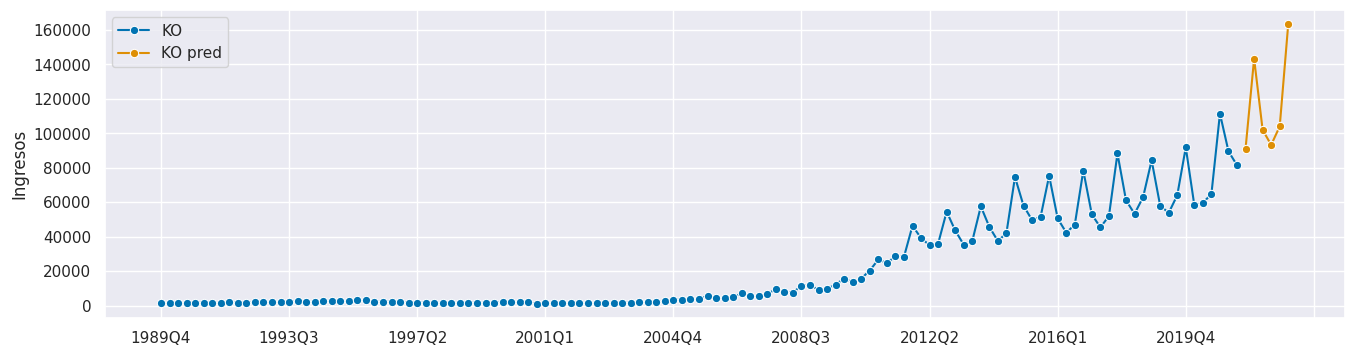

In [102]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

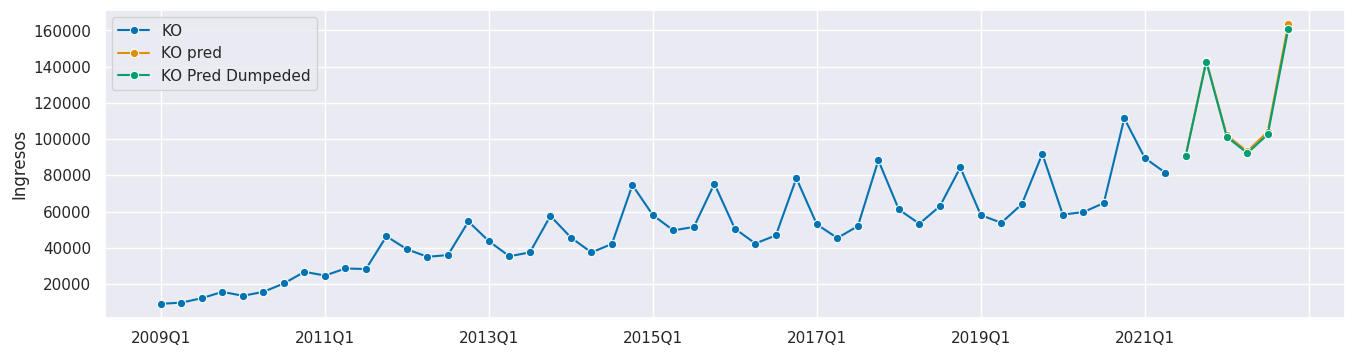

In [103]:
forecaster = ExponentialSmoothing(trend="mul",seasonal="mul",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["KO", "KO pred","KO Pred Dumpeded"])